In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import magpylib as mg

## Coil Dimensions

We assume rectangular coils with dimensions $a\times b$, separated by $\pm h$. There are $N_{coils}$ turns and a total current of $I_{coil}$

In [72]:
a = 100
b = 50
h = 28
N_coils = 25
I_coil = 5

Res_wyre = 5.5 #Usually listed as R/1000 ft
Rad_wyre = 0.0403*25.4/2
rho_cu = 8.96e-3 # g/mm^3

total_length = 2*(b+a)*N_coils*2 # perimeter * N * 2 coils
R_mm = Res_wyre/(25.4*12*1000) 
R = R_mm*total_length
m = (total_length*np.pi*Rad_wyre**2)*rho_cu
print(f'Total resistance: {round(R,3)} Ohms')
print(f'Total length: {round(total_length/(25.4*12),1)} feet')
print(f'Total mass: {round(m,1)} g')

print(f'\nCurrent required: {round(I_coil,1)} A')
print(f'Compliance Voltage required: {round(I_coil*R,1)} V')
print(f'Heat generated: {round(I_coil**2*R,2)} W')

# This is for a single N-turn rectangular coil. 
def rect_coil(length,width,z_height,curr_A=1,N_turns = 1):
    P1 = [length/2,width/2,z_height]
    P2 = [-length/2,width/2,z_height]
    P3 = [-length/2,-width/2,z_height]
    P4 = [length/2,-width/2,z_height]
    return mg.current.Line(current = curr_A*N_turns,vertices = np.array([P1,P2,P3,P4,P1]))

# Define anti-Helmholtz(ish) coils
coil1,coil2 = rect_coil(a,b,h,curr_A = I_coil,N_turns = N_coils), rect_coil(a,b,-h,curr_A = -I_coil,N_turns=N_coils)

# get total field given coils
def get_field(c1,c2,location):
    return 10*(mg.getB(c1, observers=location) + mg.getB(c2, observers=location))

Total resistance: 0.271 Ohms
Total length: 49.2 feet
Total mass: 110.6 g

Current required: 5 A
Compliance Voltage required: 1.4 V
Heat generated: 6.77 W


In [28]:
Npts = 1000
z = np.linspace(-50,50,Npts)
x0,y0 = 0,0
Bx,By,Bz = np.zeros(Npts),np.zeros(Npts),np.zeros(Npts)

# Factor of 10 converts mT to G. Multiply by Ncoils to get full field
for k in range(Npts): # TODO This can almost certainly be vectorized! 
    B = get_field(coil1,coil2,(x0,y0,z[k]))
    Bx[k],By[k],Bz[k] = B[0],B[1],B[2]

# Compute the gradient. Units are G,mm so x10 for G/cm
dBdz = np.gradient(Bz,z)*10

# Make a few plots

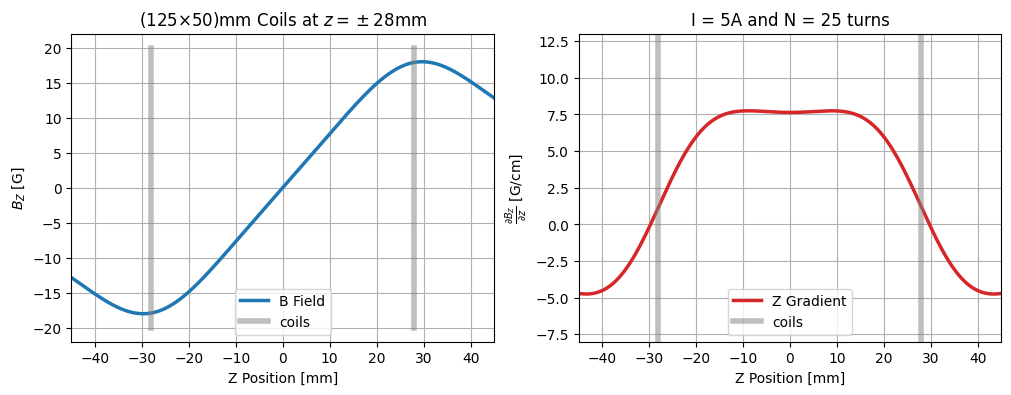

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(z,Bz,label = 'B Field',color='tab:blue',lw=2.5)
ax2.plot(z,dBdz,label = 'Z Gradient',color='tab:red',lw=2.5)
ax1.plot([-h,-h],[-20,20],lw=4,alpha=.5,color='gray')
ax1.plot([h,h],[-20,20],lw=4,alpha=.5,color='gray',label = 'coils')

ax2.plot([-h,-h],[-20,20],lw=4,alpha=.5,color='gray')
ax2.plot([h,h],[-20,20],lw=4,alpha=.5,color='gray',label = 'coils')

# ax1.set_ylim(-17,17)
ax2.set_ylim(-8,13)
ax1.set_xlim(-45,45)
ax2.set_xlim(-45,45)

ax1.legend()
ax2.legend()

ax1.set_xlabel('Z Position [mm]')
ax2.set_xlabel('Z Position [mm]')
ax1.set_ylabel('$B_Z$ [G]')
ax2.set_ylabel('$\\frac{\partial B_Z}{\partial z}$ [G/cm]')
ax1.set_title(f'({a}$\\times${b})mm Coils at $z=\pm${h}mm')
ax2.set_title(f'I = {I_coil}A and N = {N_coils} turns')
ax1.grid(True)
ax2.grid(True)

In [28]:
Npts = 1000
x = np.linspace(-10,10,Npts)
y0,z0 = 0,0
Bx,By,Bz = np.zeros(Npts),np.zeros(Npts),np.zeros(Npts)
# Factor of 10 converts mT to G. Multiply by Ncoils to get full field
for k in range(Npts): # TODO This can almost certainly be vectorized! 
    B = get_field(coil1,coil2,(x[k],y0,z0))
    Bx[k],By[k],Bz[k] = B[0],B[1],B[2]

y = np.linspace(-10,10,Npts)
x0,z0 = 0,0
Hx,Hy,Hz = np.zeros(Npts),np.zeros(Npts),np.zeros(Npts)
for k in range(Npts): # TODO This can almost certainly be vectorized! 
    B = get_field(coil1,coil2,(x0,y[k],z0))
    Hx[k],Hy[k],Bz[k] = B[0],B[1],B[2]

# dBdx = np.gradient(Bx,x)*10

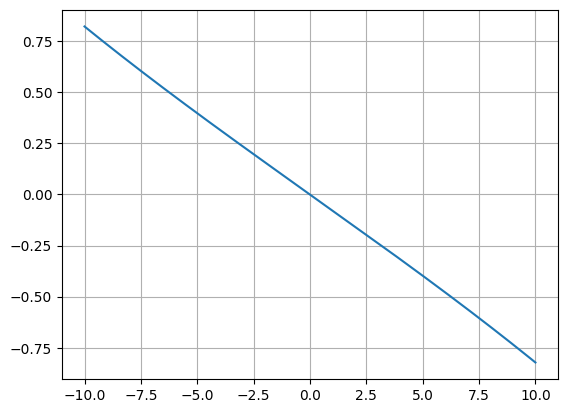

In [32]:
fig,ax = plt.subplots()

for y in np.linspace(-0.5,0.5,10):
    x0 = 0
    while get_field(coil1,coil2,(x0,y,0))

ax.plot(x,Bx)
# ax.plot(y,Hy)
# ax.plot(x,Bz)
ax.grid()

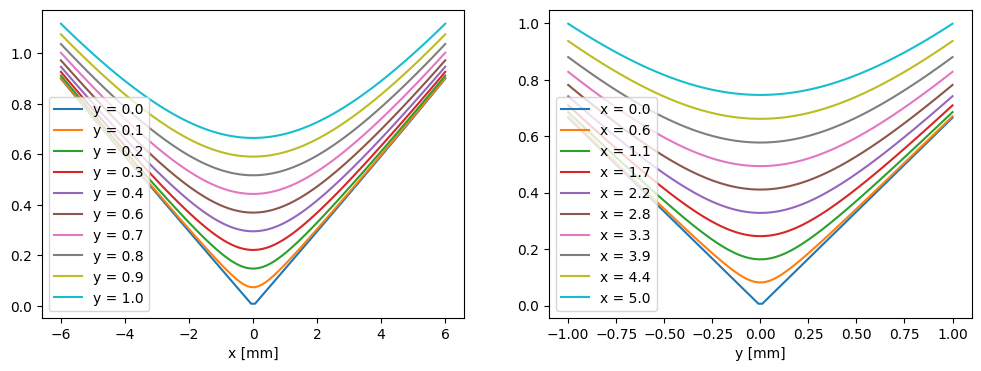

In [74]:
def amag(r):
    return np.sqrt(r[0]**2 + r[1]**2 + r[2]**2)

y = np.linspace(0,1,10)
x = np.linspace(-6,6,100)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = [12,4])

for k in range(len(y)):
    B = np.zeros(len(x))
    for j in range(len(x)):
        B[j] = amag(get_field(coil1,coil2,(x[j],y[k],0)))
    ax1.plot(x,B,label = f'y = {round(y[k],1)}')

x = np.linspace(0,5,10)
y = np.linspace(-1,1,100)


for k in range(len(x)):
    B = np.zeros(len(y))
    for j in range(len(y)):
        B[j] = amag(get_field(coil1,coil2,(x[k],y[j],0)))
    ax2.plot(y,B,label = f'x = {round(x[k],1)}')

ax1.set_xlabel('x [mm]')
ax2.set_xlabel('y [mm]')
ax1.legend()
ax2.legend()